In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Load dataset (pastikan sudah upload)
df = pd.read_csv('StudentsPerformance.csv')

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
print("Jumlah baris & kolom:", df.shape)
print("\nInfo dataset:\n")
print(df.info())
print("\nCek missing value:\n", df.isnull().sum())


Jumlah baris & kolom: (1000, 8)

Info dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Cek missing value:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
re

In [3]:
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 70 else 0)

df[['average_score','pass']].head()


,average_score,pass
0,72.666667,1
1,82.333333,1
2,92.666667,1
3,49.333333,0
4,76.333333,1


In [4]:
# Pisahkan fitur & target
X = df.drop(columns=['pass'])
y = df['pass']

# Label encoding untuk kolom kategorikal
label_cols = X.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    X[col] = le.fit_transform(X[col])

X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((800, 9), (200, 9))

In [6]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        92

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



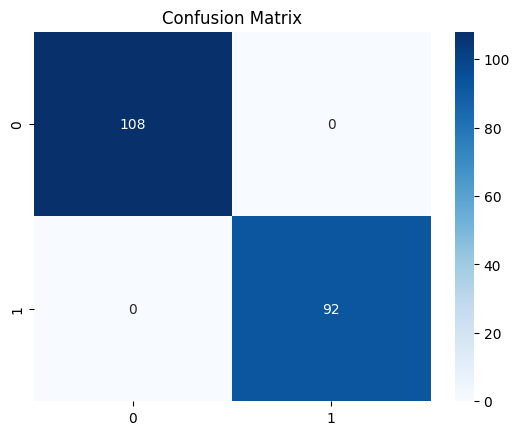

In [7]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()


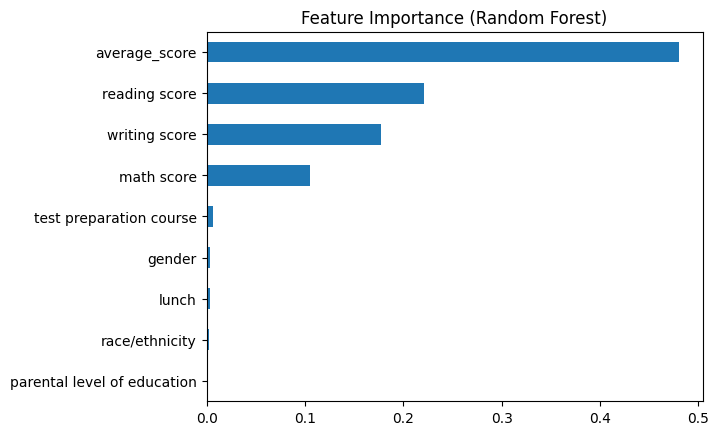

In [8]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [9]:
joblib.dump(rf, 'random_forest_student_performance.joblib')
print("Model saved.")


Model saved.
